Populating the interactive namespace from numpy and matplotlib


RuntimeError: NetCDF: Not a valid ID

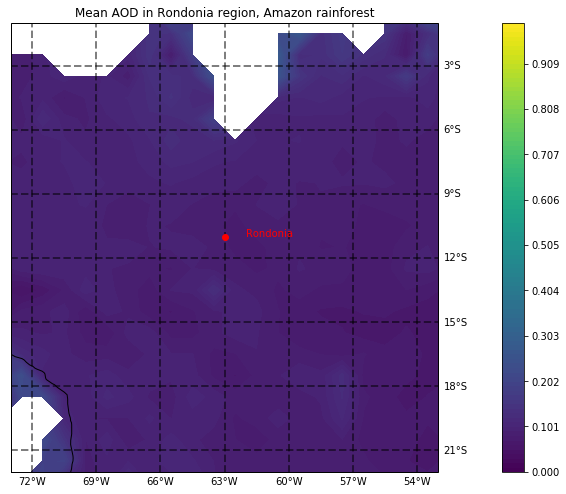

In [26]:
%pylab inline
from numpy import * 
from math import *
import os,sys
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
from cartopy import config



fig = plt.figure(figsize=(50, 38))

# get the path of the file. It can be found in the repo data directory.
Aero_data = '200806-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ORAC-MONTHLY-fv04.01.nc'
readfile = Dataset(Aero_data, mode='r')

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-73, -53,-1, -22,], ccrs.PlateCarree())


plt.title('Mean AOD in Rondonia region, Amazon rainforest')

lons = readfile.variables['longitude'][:] #retreive the longitude variables from the data file
lats = readfile.variables['latitude'][:] #for the latitude variables
AOD_mean = readfile.variables['AOD550_mean'][:,:]  
readfile.close() 

# Set the GeoAxes to a projection onto a cylinder tangent at the Equator.

#change_geometry(numrows, numcols, num)
ax.change_geometry(4,2,1)

#labeling the gridlines with just numbers, colouring the line black with the style -- and a linewidth of 2. 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=2, color='black', alpha=0.5, linestyle='--')


gl.xlabels_top = False
gl.ylabels_left = False

#creating the contour plot using the lat,lon and AOD_mean variables.
levels = linspace(0,1,100)
plot = plt.contourf(lons,lats, AOD_mean, levels, 
             transform=ccrs.PlateCarree())

#create a colourbar. Shrink indicates the fraction by which to shrink the colourbar

#plt.pcolor(lons, lats, AOD_mean, cmap='cool')
colourbar = plt.colorbar(plot)
#x.formatter makes the -ve x values west and positive values east
#y.formatter -ve = south, + = north
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

#mark on coastlines 
ax.coastlines('50m')

Rondonia_lon, Rondonia_lat = -63,-11

plt.plot([Rondonia_lon], [Rondonia_lat],
         color='red', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )
ax.text(-62,-11, 'Rondonia', color = 'red', transform=ccrs.Geodetic())

meanvalue = readfile.variables['AOD550_mean'][26,78]
print meanvalue
#show the plot
plt.show()
